In [355]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
from matplotlib.ticker import PercentFormatter
import seaborn as sns
import pickle
import nltk
nltk.download("words")
from nltk.corpus import words

pd.set_option('display.max_columns', 10000)

[nltk_data] Downloading package words to
[nltk_data]     /Users/carlosruiz/nltk_data...
[nltk_data]   Package words is already up-to-date!


In [285]:
df=pd.read_csv('judge-1377884607_tweet_product_company.csv',encoding = 'unicode_escape')

In [286]:
df.head()

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion


In [287]:
df.columns=['tweet','company','emotion']

In [288]:
df=df.drop([6]).reset_index(drop=True)

In [289]:
df['emotion'] = df['emotion'].apply(lambda x: "No emotion toward brand or product" if x == "I can't tell" else x)

In [290]:
df[df.emotion=='No emotion toward brand or product'].company.value_counts()

iPad                               28
Apple                              23
Google                             16
iPhone                             10
Other Google product or service    10
iPad or iPhone App                 10
Other Apple product or service      1
Android App                         1
Android                             1
Name: company, dtype: int64

In [291]:
import re
import string

def clean_text_round1(text):
    '''Make text lowercase, remove text in square brackets, remove punctuation and remove words containing numbers.'''
    text = text.lower()
    text = re.sub('[%s]' % re.escape(string.punctuation), ' ', text)
    text = re.sub('\w*\d\w*', ' ', text)
    text = re.sub(r'^https?:\/\/.*[\r\n]*', ' ', text, flags=re.MULTILINE)

    return text

round1 = lambda x: clean_text_round1(x)

In [292]:
df['clean_tweet']=df.tweet.apply(round1)

In [293]:
df

,tweet,company,emotion,clean_tweet
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion,i have a iphone after hrs tweeting at...
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion,jessedee know about fludapp awesome ipad i...
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion,swonderlin can not wait for ipad also the...
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion,sxsw i hope this year s festival isn t as cra...
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion,sxtxstate great stuff on fri sxsw marissa m...
...,...,...,...,...
9087,Ipad everywhere. #SXSW {link},iPad,Positive emotion,ipad everywhere sxsw link
9088,"Wave, buzz... RT @mention We interrupt your re...",NaN,No emotion toward brand or product,wave buzz rt mention we interrupt your re...
9089,"Google's Zeiger, a physician never reported po...",NaN,No emotion toward brand or product,google s zeiger a physician never reported po...
9090,Some Verizon iPhone customers complained their...,NaN,No emotion toward brand or product,some verizon iphone customers complained their...


In [294]:
punctuation=[",",".","#","!","@","$","?","$","%","&","-","_",":","=", "/",";",'(',")", "{","}","|"]
apple=['iPhone',"iphones",'i phones',"iPad&quot;","iphone ",'i Pad','i Pad',"Apple.","iPad?","#iPad","#iPhone",'iPad','Mac',"iphone,",'iPod','ipod','ipad','mac','Apple','apple','Apple\'s','apple\'s',"#Apple",'#apple','I-Pad']
google=['Google','google','android','Android','Google.','android,',"#android","Google's",'google\'s','googles' ,'#google','#Google']

In [295]:
for index in df.index:
    tweet="".join(i if i not in punctuation else " " for i in df.tweet[index])
    condition=0
    df.tweet[index]=tweet

    
    if bool(set(tweet.split())&set(apple))==True:
        df.company[index]=(list(set(tweet.split())&set(apple))[0].title().strip("'s")).strip('\'S')
        condition=1
    else:
        condition=0
        
    if (bool(set(tweet.split())&set(google))==True) and condition==0:
        df.company[index]=(list(set(tweet.split())&set(google))[0].title().strip('\'s')).strip('\'S')
        
    elif (bool(set(tweet.split())&set(google))==True) and condition==1:
        df.company[index]+= " & "+(list(set(tweet.split())&set(google))[0].title().strip('\'s')).strip('\'S')



In [296]:
# df['company'] = df['company'].apply(lambda x: "iPad" if x == "Ipad" else x)
# df['company'] = df['company'].apply(lambda x: "iPhone" if x == "Iphone" else x)

In [297]:
df['brand'] = df['company'].apply(lambda x: 'Apple' if x in apple else 'Google' if x in google else '')

In [298]:
df.company.value_counts()

Google                             2413
Apple                              2065
iPad                               1848
iPhone                             1131
Android                             379
Iphone & Android                    132
iPad or iPhone App                   54
Ipad & Android                       29
Mac                                  26
Apple & Google                       23
Ipod                                 15
Other Apple product or service       12
Apple & Android                       7
Ipad & Google                         5
Iphone & Google                       4
Other Google product or service       2
Mac & Android                         1
Ipod & Android                        1
Name: company, dtype: int64

In [299]:
df.brand.value_counts()

Apple     5070
Google    2792
          1230
Name: brand, dtype: int64

In [300]:
df.clean_tweet[1]

' jessedee know about  fludapp   awesome ipad iphone app that you ll likely appreciate for its design  also  they re giving free ts at  sxsw'

In [301]:
from nltk.stem import PorterStemmer

In [308]:
def stemmer(text):
    ps = PorterStemmer()


    filtered_review=text.split()
    stemmed_review=[]
    for w in filtered_review:
        stemmed_review.append(ps.stem(w))

    return stemmed_review

stem = lambda x: stemmer(x)

In [329]:
df['setmming_tweet']=df.clean_tweet.apply(stem)

In [330]:
df["setmming_tweet"][0]

['i',
 'have',
 'a',
 'iphon',
 'after',
 'hr',
 'tweet',
 'at',
 'rise',
 'austin',
 'it',
 'wa',
 'dead',
 'i',
 'need',
 'to',
 'upgrad',
 'plugin',
 'station',
 'at',
 'sxsw']

In [317]:
from nltk.stem import WordNetLemmatizer 
  
lemmatizer = WordNetLemmatizer() 

In [318]:
def lemmer(text):
    lemmatizer = WordNetLemmatizer() 
    filtered_review=text.split()
    lemmatized_review=[]
    for w in filtered_review:
        lemmatized_review.append(lemmatizer.lemmatize(w))

    return lemmatized_review


lemming = lambda x: lemmer(x)

In [327]:
df['lemming_tweet']=df.clean_tweet.apply(lemming)

In [331]:
df['lemming_tweet'][0]

['i',
 'have',
 'a',
 'iphone',
 'after',
 'hr',
 'tweeting',
 'at',
 'rise',
 'austin',
 'it',
 'wa',
 'dead',
 'i',
 'need',
 'to',
 'upgrade',
 'plugin',
 'station',
 'at',
 'sxsw']

In [322]:
df

,tweet,company,emotion,clean_tweet,brand,setmming_tweet,lemming_tweet
0,wesley83 I have a 3G iPhone After 3 hrs twe...,iPhone,Negative emotion,i have a iphone after hrs tweeting at...,Apple,"[wesley83, I, have, a, 3G, iphon, after, 3, hr...","[wesley83, I, have, a, 3G, iPhone, After, 3, h..."
1,jessedee Know about fludapp Awesome iPad i...,iPad,Positive emotion,jessedee know about fludapp awesome ipad i...,Apple,"[jessede, know, about, fludapp, awesom, ipad, ...","[jessedee, Know, about, fludapp, Awesome, iPad..."
2,swonderlin Can not wait for iPad 2 also The...,iPad,Positive emotion,swonderlin can not wait for ipad also the...,Apple,"[swonderlin, can, not, wait, for, ipad, 2, als...","[swonderlin, Can, not, wait, for, iPad, 2, als..."
3,sxsw I hope this year's festival isn't as cra...,iPhone,Negative emotion,sxsw i hope this year s festival isn t as cra...,Apple,"[sxsw, I, hope, thi, year', festiv, isn't, as,...","[sxsw, I, hope, this, year's, festival, isn't,..."
4,sxtxstate great stuff on Fri SXSW Marissa M...,Google,Positive emotion,sxtxstate great stuff on fri sxsw marissa m...,Google,"[sxtxstate, great, stuff, on, fri, sxsw, maris...","[sxtxstate, great, stuff, on, Fri, SXSW, Maris..."
...,...,...,...,...,...,...,...
9087,Ipad everywhere SXSW link,iPad,Positive emotion,ipad everywhere sxsw link,Apple,"[ipad, everywher, sxsw, link]","[Ipad, everywhere, SXSW, link]"
9088,Wave buzz RT mention We interrupt your re...,Google,No emotion toward brand or product,wave buzz rt mention we interrupt your re...,Google,"[wave, buzz, RT, mention, We, interrupt, your,...","[Wave, buzz, RT, mention, We, interrupt, your,..."
9089,Google's Zeiger a physician never reported po...,Google,No emotion toward brand or product,google s zeiger a physician never reported po...,Google,"[google', zeiger, a, physician, never, report,...","[Google's, Zeiger, a, physician, never, report..."
9090,Some Verizon iPhone customers complained their...,iPhone,No emotion toward brand or product,some verizon iphone customers complained their...,Apple,"[some, verizon, iphon, custom, complain, their...","[Some, Verizon, iPhone, customer, complained, ..."


In [326]:
df[df["brand"]=="Apple"]

,tweet,company,emotion,clean_tweet,brand,setmming_tweet,lemming_tweet
0,wesley83 I have a 3G iPhone After 3 hrs twe...,iPhone,Negative emotion,i have a iphone after hrs tweeting at...,Apple,"[wesley83, I, have, a, 3G, iphon, after, 3, hr...","[wesley83, I, have, a, 3G, iPhone, After, 3, h..."
1,jessedee Know about fludapp Awesome iPad i...,iPad,Positive emotion,jessedee know about fludapp awesome ipad i...,Apple,"[jessede, know, about, fludapp, awesom, ipad, ...","[jessedee, Know, about, fludapp, Awesome, iPad..."
2,swonderlin Can not wait for iPad 2 also The...,iPad,Positive emotion,swonderlin can not wait for ipad also the...,Apple,"[swonderlin, can, not, wait, for, ipad, 2, als...","[swonderlin, Can, not, wait, for, iPad, 2, als..."
3,sxsw I hope this year's festival isn't as cra...,iPhone,Negative emotion,sxsw i hope this year s festival isn t as cra...,Apple,"[sxsw, I, hope, thi, year', festiv, isn't, as,...","[sxsw, I, hope, this, year's, festival, isn't,..."
5,teachntech00 New iPad Apps For SpeechTherapy...,iPad,No emotion toward brand or product,new ipad apps for speechtherapy and commun...,Apple,"[teachntech00, new, ipad, app, for, speechther...","[teachntech00, New, iPad, Apps, For, SpeechThe..."
...,...,...,...,...,...,...,...
9078,quot papyrus sort of like the ipad quot ...,iPad,Positive emotion,quot papyrus sort of like the ipad quot ...,Apple,"[quot, papyru, sort, of, like, the, ipad, quot...","[quot, papyrus, sort, of, like, the, ipad, quo..."
9081,Apple guys screaming and running by line to o...,Apple,No emotion toward brand or product,apple guys screaming and running by line to o...,Apple,"[appl, guy, scream, and, run, by, line, to, op...","[Apple, guy, screaming, and, running, by, line..."
9084,I've always used Camera+ for my iPhone b c it ...,iPad,Positive emotion,i ve always used camera for my iphone b c it ...,Apple,"[i'v, alway, use, camera+, for, my, iphon, b, ...","[I've, always, used, Camera+, for, my, iPhone,..."
9087,Ipad everywhere SXSW link,iPad,Positive emotion,ipad everywhere sxsw link,Apple,"[ipad, everywher, sxsw, link]","[Ipad, everywhere, SXSW, link]"


In [348]:
# from sklearn.feature_extraction.text import CountVectorizer

# cv = CountVectorizer(stop_words='english')
# data_cv = cv.fit_transform(df.clean_tweet)
# df_cv = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names())
# df_cv.index = df.index
# df_cv

In [383]:
%%time
dictionary={}
companies=list(df.company.unique())
iteration=1
for company in companies:
    print("This is iteration: "+str(iteration)+" of "+str(len(companies)))
    tweet=[]
    for index in df[df["company"]==company].index:
        print('\r' +str(index), end="", flush=True)
        tweet.append(" ".join(i if i  in words.words() else "" for i in df.tweet[index].lower().split()))
    dictionary[company]=tweet
    iteration+=1
    break
dictionary

This is iteration: 1 of 19
9090CPU times: user 24min 4s, sys: 2min 59s, total: 27min 4s
Wall time: 27min 5s


{'iPhone': [' i have a   after    at rise  it was dead i need to upgrade   at ',
  ' i hope this  festival  as  as this    ',
  'i just   is coming this weekend how many   will be an hour late at  come  morning  ',
  'just added my   to  matching people on   also  the    nicely done',
  'photo just  the    which is really nice    ',
  'hey  how long do you think it  us to make an  case answer mention   and  make you one',
  'for i pad  mention new  for  now in the  store   to   by link',
  'hand      with a     link',
  'i love my mention  case from  but i  get my phone out of it fail',
  'new post mention    it easy to connect on all social  with people you meet link ',
  'nice that mention   is  today  yesterday were ridiculous ',
  'what mention  does not provide     my mind about going next year',
  '  mention new  for  now in the  store   to   by  link',
  'know that quot  quot  to quot satanic quot on an   just  ',
  'funny how  is  but not  only a matter of  at this point at lea

In [ ]:
# df2=pd.DataFrame(columns=['company','tweets'])
df2['tweets']=list(dictionary.values())
df2['company']=list(dictionary.keys())[0]

In [490]:
dictionary={}
companies=list(df.company.unique())
iteration=1
for company in companies:
    print("This is iteration: "+str(iteration)+" of "+str(len(companies)))
    tweet=[]
    for index in df[df["company"]==company].index:
        print('\r' +str(index), end="", flush=True)
        tweet.append(" ".join(i if i  in words.words() else "" for i in df.tweet[index].lower().split()))
    dictionary[company]=tweet
    iteration+=1
dictionary

This is iteration: 1 of 19
9090This is iteration: 2 of 19
9087This is iteration: 3 of 19
9091This is iteration: 4 of 19
9086This is iteration: 5 of 19
9081This is iteration: 6 of 19
9037This is iteration: 7 of 19
8538This is iteration: 8 of 19
This is iteration: 9 of 19
8838This is iteration: 10 of 19
8817This is iteration: 11 of 19
8983This is iteration: 12 of 19
8705This is iteration: 13 of 19
8752This is iteration: 14 of 19
5263This is iteration: 15 of 19
8827This is iteration: 16 of 19
6163This is iteration: 17 of 19
5390This is iteration: 18 of 19
1998This is iteration: 19 of 19
7973

{'iPhone': [' i have a   after    at rise  it was dead i need to upgrade   at ',
  ' i hope this  festival  as  as this    ',
  'i just   is coming this weekend how many   will be an hour late at  come  morning  ',
  'just added my   to  matching people on   also  the    nicely done',
  'photo just  the    which is really nice    ',
  'hey  how long do you think it  us to make an  case answer mention   and  make you one',
  'for i pad  mention new  for  now in the  store   to   by link',
  'hand      with a     link',
  'i love my mention  case from  but i  get my phone out of it fail',
  'new post mention    it easy to connect on all social  with people you meet link ',
  'nice that mention   is  today  yesterday were ridiculous ',
  'what mention  does not provide     my mind about going next year',
  '  mention new  for  now in the  store   to   by  link',
  'know that quot  quot  to quot satanic quot on an   just  ',
  'funny how  is  but not  only a matter of  at this point at lea

In [492]:

with open('dictionary.pickle', 'wb') as handle:
    pickle.dump(dictionary, handle, protocol=pickle.HIGHEST_PROTOCOL)


In [505]:
sentiment_df=pd.DataFrame(columns=['company','tweets'])
sentiment_df['tweets']=list(dictionary.values())
sentiment_df['company']=list(dictionary.keys())

In [586]:
df.company.count()

8147

In [583]:
df[df.company=='Ipad & Google'].tweet.iloc[1]

' mention has their Google Analytics up   58 967 visits  ipad and iphone are ranked in top 5 ways people access it   newsapps  sxsw'

In [512]:
#sentiment_df.drop(index=7,axis=0, inplace=True,)
sentiment_df.reset_index(drop=True,inplace=True)
sentiment_df

,company,tweets
0,iPhone,[ i have a after at rise it was dead i n...
1,iPad,[ know about awesome that likely apprecia...
2,Google,"[ great stuff on tech , love this..."
3,Android,[ is just starting is around the corner and ...
4,Apple,[counting down the days to plus strong dolla...
5,Iphone & Android,[the new like it is going to rock update for...
6,Apple & Google,[ and apple force print media to evolve link ...
7,Mac,[ mention mac here mention my confession ...
8,Ipad & Android,[ android the world panel at today by me...
9,iPad or iPhone App,[found the my not when in background nee...


In [332]:
# Split each routine into 10 parts
import numpy as np
import math

def split_text(text, n=10):
    '''Takes in a string of text and splits into n equal parts, with a default of 10 equal parts.'''

    # Calculate length of text, the size of each chunk of text and the starting points of each chunk of text
    length = len(text)
    size = math.floor(length / n)
    start = np.arange(0, length, size)
    
    # Pull out equally sized pieces of text and put it into a list
    split_list = []
    for piece in range(n):
        split_list.append(text[start[piece]:start[piece]+size])
    return split_list

In [343]:
# Let's take a look at our data again
df[["company",'lemming_tweet']].groupby('company')

In [524]:
# # Let's create a list to hold all of the pieces of text
# list_pieces = []
# for t in sentiment_df.tweets:
#     split = split_text(t)
#     list_pieces.append(split)
    
# list_pieces

In [525]:
from textblob import TextBlob
# Calculate the polarity for each piece of text

polarity_transcript = []
for lp in sentiment_df.tweets:
    polarity_piece = []
    for p in lp:
        polarity_piece.append(TextBlob(p).sentiment.polarity)
        polarity_piece.sort()
    polarity_transcript.append(polarity_piece)
    
polarity_transcript

[[-0.8,
  -0.7999999999999999,
  -0.6999999999999998,
  -0.6999999999999998,
  -0.6999999999999998,
  -0.6999999999999998,
  -0.65,
  -0.65,
  -0.6333333333333333,
  -0.6,
  -0.6,
  -0.6,
  -0.5325,
  -0.5,
  -0.5,
  -0.5,
  -0.5,
  -0.5,
  -0.5,
  -0.5,
  -0.5,
  -0.5,
  -0.5,
  -0.4185185185185185,
  -0.4,
  -0.4,
  -0.4,
  -0.4,
  -0.4,
  -0.4,
  -0.4,
  -0.4,
  -0.4,
  -0.4,
  -0.4,
  -0.4,
  -0.4,
  -0.4,
  -0.4,
  -0.4,
  -0.4,
  -0.4,
  -0.4,
  -0.4,
  -0.4,
  -0.4,
  -0.4,
  -0.4,
  -0.3888888888888889,
  -0.35,
  -0.30000000000000004,
  -0.30000000000000004,
  -0.3,
  -0.2777777777777778,
  -0.275,
  -0.27499999999999997,
  -0.27499999999999997,
  -0.2625,
  -0.25,
  -0.25,
  -0.25,
  -0.25,
  -0.25,
  -0.25,
  -0.25,
  -0.25,
  -0.25,
  -0.25,
  -0.25,
  -0.25,
  -0.24074074074074078,
  -0.23958333333333331,
  -0.22499999999999995,
  -0.205,
  -0.2,
  -0.2,
  -0.2,
  -0.2,
  -0.2,
  -0.190625,
  -0.18333333333333335,
  -0.1777777777777778,
  -0.16666666666666666,
  -0.1666666

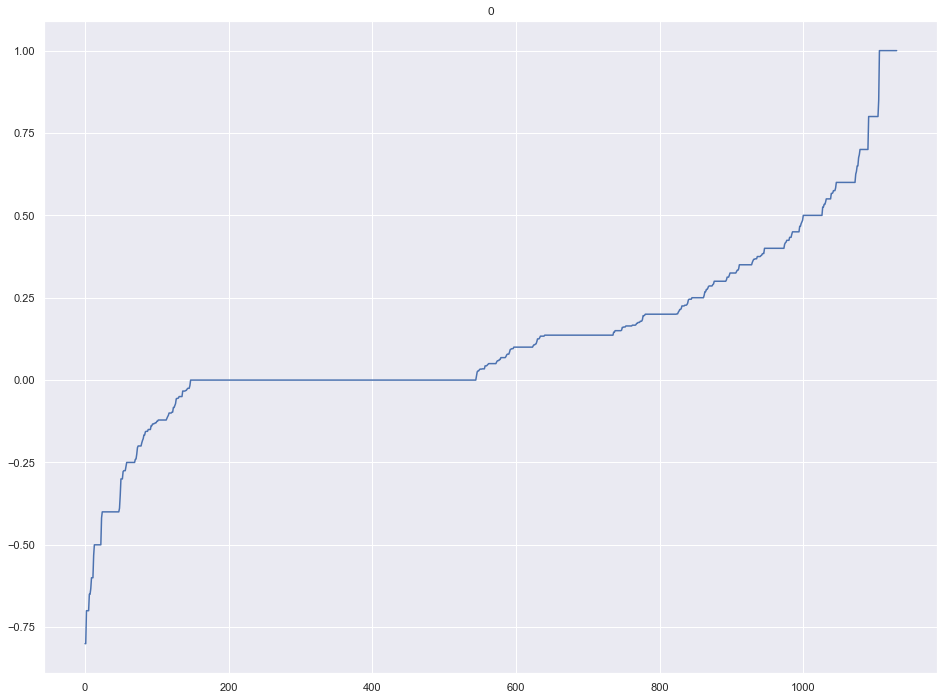

In [526]:

# Show the plot for one comedian
plt.plot(polarity_transcript[0])
plt.title(sentiment_df['company'].index[0])
plt.show()

ValueError: num must be 1 <= num <= 12, not 13

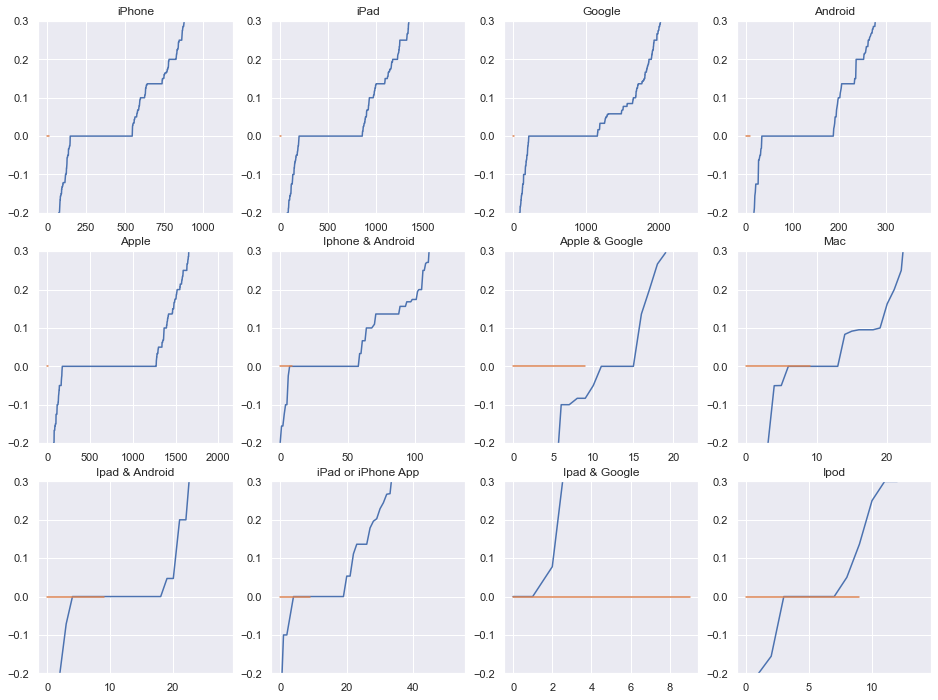

In [527]:
# Show the plot for all comedians
plt.rcParams['figure.figsize'] = [16, 12]

for index, comedian in enumerate(df.index):    
    plt.subplot(3, 4, index+1)
    plt.plot(polarity_transcript[index])
    plt.plot(np.arange(0,10), np.zeros(10))
    plt.title(sentiment_df['company'][index])
    plt.ylim(ymin=-.2, ymax=.3)
    
plt.show()

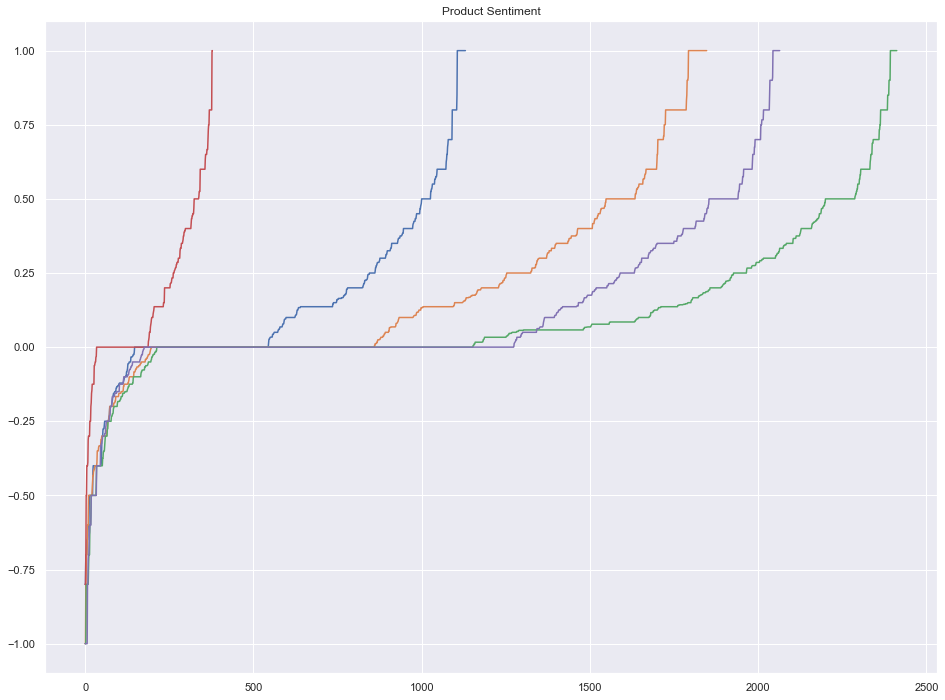

In [556]:
# Show the plot for one comedian
plt.plot(polarity_transcript[0])
plt.plot(polarity_transcript[1])
plt.plot(polarity_transcript[2])
plt.plot(polarity_transcript[3])
plt.plot(polarity_transcript[4])
plt.title('Product Sentiment')
plt.show()

In [570]:
import random
hold=[]
sampling=[]
for i in range(4):
    hold=polarity_transcript[i]
    sampling.append(random.choices(hold, k=1000))
    sampling[i].sort()
    

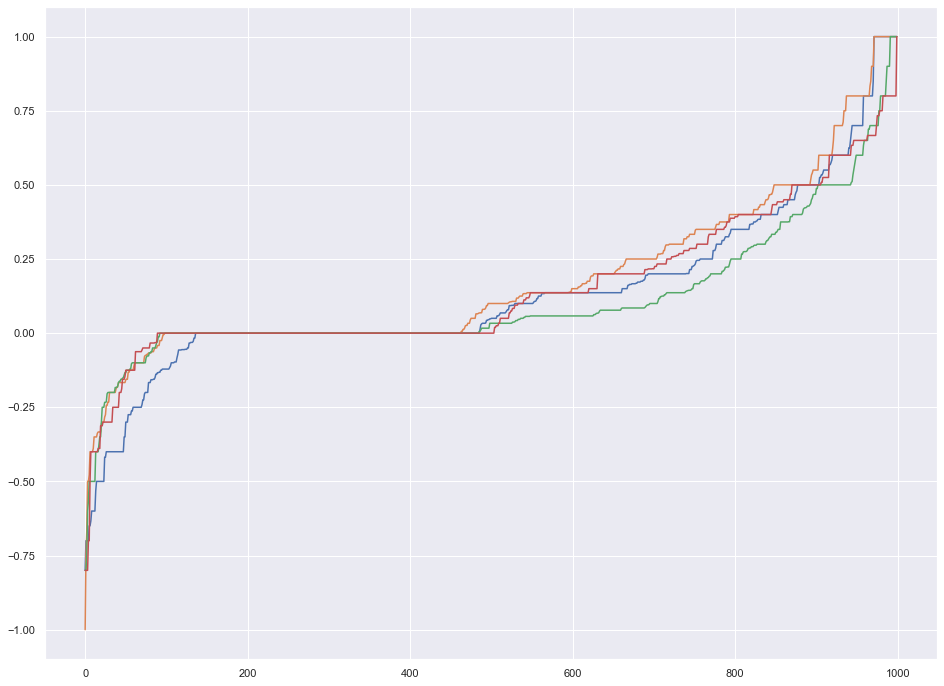

In [573]:
plt.plot(sampling[0])
plt.plot(sampling[1])
plt.plot(sampling[2])
plt.plot(sampling[3])

(array([  3.,  10.,   8.,  55., 619., 121.,  80.,  63.,  27.,  14.]),
 array([-0.8 , -0.62, -0.44, -0.26, -0.08,  0.1 ,  0.28,  0.46,  0.64,
         0.82,  1.  ]),
 <BarContainer object of 10 artists>)

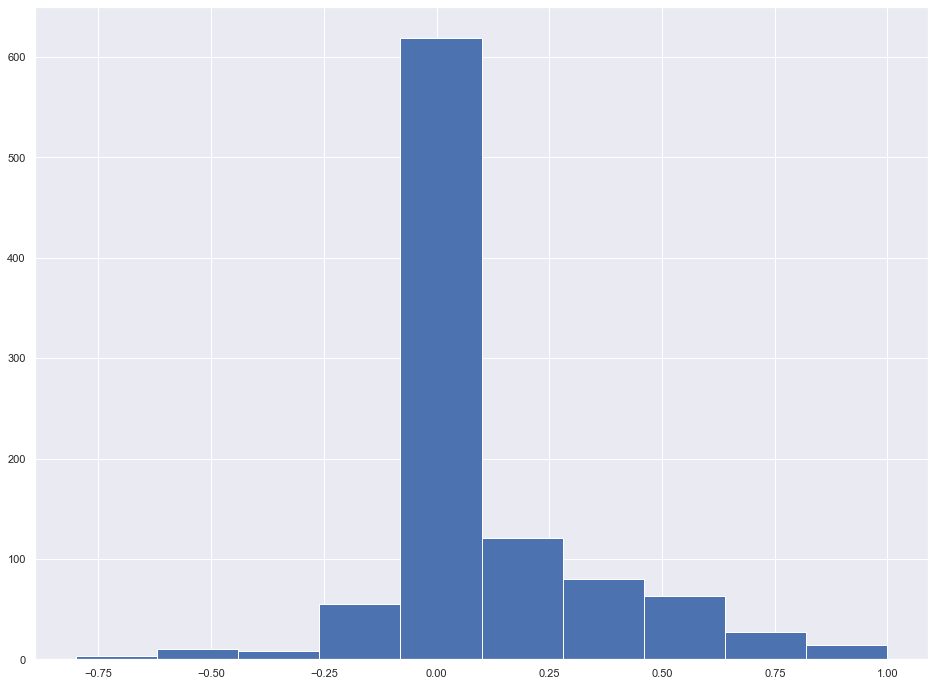

In [595]:
#plt.hist(sampling[0])
#plt.hist(sampling[1])
plt.hist(sampling[2])
#plt.hist(sampling[3])

In [600]:
fig, axs = plt.subplots(2, 2)
axs[0, 0].plot()
axs[0, 0].set_title('Axis [0, 0]')
axs[0, 1].plot.hist(sampling[0])
axs[0, 1].set_title('Axis [0, 1]')
axs[1, 0].plot.hist(sampling[0])
axs[1, 0].set_title('Axis [1, 0]')
axs[1, 1].plot.hist(sampling[0])
axs[1, 1].set_title('Axis [1, 1]')

AttributeError: 'function' object has no attribute 'subplots'

In [208]:
dfg=df[['brand','emotion','tweet']].groupby(['brand','emotion']).count()[6:9]
t=dfg['tweet'][0]+dfg['tweet'][1]+dfg['tweet'][2]
for i in range(3):
    dfg['tweet'][i]=dfg['tweet'][i]*100/t

[]

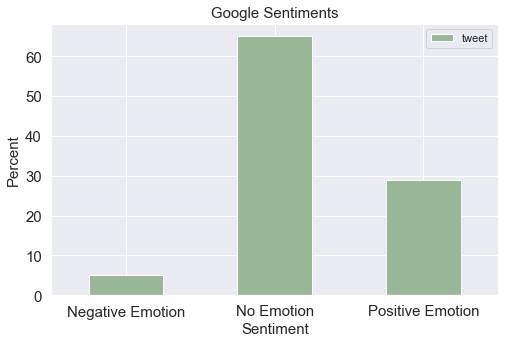

In [246]:
ax=dfg.plot(kind="bar",figsize=(8,5),fontsize=15,color="#99B898")
ax.set_xticklabels(['Negative Emotion','No Emotion','Positive Emotion'],rotation=0,fontsize=15)
ax.set_title('Google Sentiments',fontsize=15)
ax.set_ylabel('Percent',fontsize=15)
ax.set_xlabel('Sentiment',fontsize=15)
ax.plot()

In [213]:
dfa=df[['brand','emotion','tweet']].groupby(['brand','emotion']).count()[3:6]
t=dfa['tweet'][0]+dfa['tweet'][1]+dfa['tweet'][2]
for i in range(3):
    dfa['tweet'][i]=dfa['tweet'][i]*100/t

Text(0.5, 0, 'Sentiment')

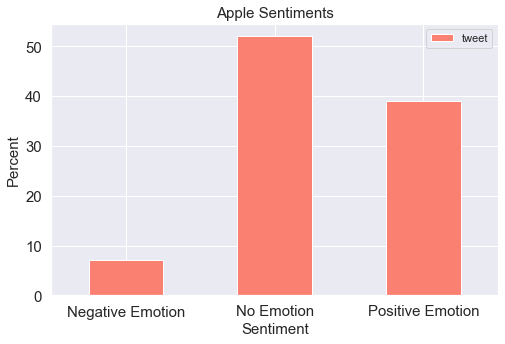

In [214]:
ax=dfa.plot(kind="bar",figsize=(8,5),fontsize=15,color='salmon')
ax.set_xticklabels(['Negative Emotion','No Emotion','Positive Emotion'],rotation=0,fontsize=15)
ax.set_title('Apple Sentiments',fontsize=15)
ax.set_ylabel('Percent',fontsize=15)
ax.set_xlabel('Sentiment',fontsize=15)

In [216]:
df[['company','emotion','tweet']].groupby(['company','emotion']).count()

tweet
company                         emotion                                  
Android                         Negative emotion                       17
                                No emotion toward brand or product    214
                                Positive emotion                      148
Apple                           Negative emotion                      113
                                No emotion toward brand or product   1124
                                Positive emotion                      828
Apple & Android                 No emotion toward brand or product      4
                                Positive emotion                        3
Apple & Google                  Negative emotion                        1
                                No emotion toward brand or product     14
                                Positive emotion                        8
Google                          Negative emotion                      133
                                No emotion toward brand or product   1612
                                Positive emotion                      668
Ipad & Android                  No emotion toward brand or product     25
                                Positive emotion                        4
Ipad & Google                   No emotion toward brand or product      3
                                Positive emotion                        2
Iphone & Android                Negative emotion                        4
                                No emotion toward brand or product     91
                                Positive emotion                       37
Iphone & Google                 No emotion toward brand or product      1
                                Positive emotion                        3
Ipod                            No emotion toward brand or product      9
                                Positive emotion                        6
Ipod & Android                  Negative emotion                        1
Mac                             Negative emotion                        3
                                No emotion toward brand or product     13
                                Positive emotion                       10
Mac & Android                   Positive emotion                        1
Other Apple product or service  Positive emotion                       12
Other Google product or service Negative emotion                        1
                                Positive emotion                        1
iPad                            Negative emotion                      154
                                No emotion toward brand or product    922
                                Positive emotion                      772
iPad or iPhone App              Negative emotion                        5
                                No emotion toward brand or product      1
                                Positive emotion                       48
iPhone                          Negative emotion                      132
                                No emotion toward brand or product    599
                                Positive emotion                      400

In [237]:
dfi=df[['company','emotion','tweet']].groupby(['company','emotion']).count()[39:43]
t=dfi['tweet'][0]+dfi['tweet'][1]+dfi['tweet'][2]
for i in range(3):
    dfi['tweet'][i]=dfi['tweet'][i]*100/t

Text(0.5, 0, 'Sentiment')

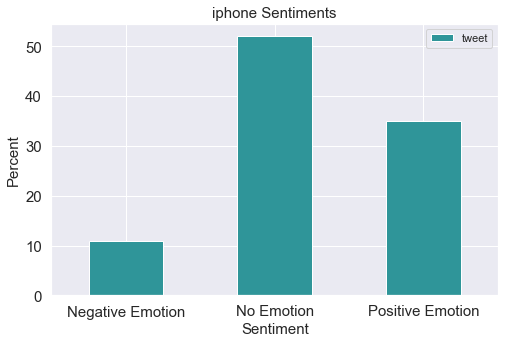

In [243]:
ax=dfi.plot(kind="bar",figsize=(8,5),fontsize=15,color='#2F9599')
ax.set_xticklabels(['Negative Emotion','No Emotion','Positive Emotion'],rotation=0,fontsize=15)
ax.set_title('iphone Sentiments',fontsize=15)
ax.set_ylabel('Percent',fontsize=15)
ax.set_xlabel('Sentiment',fontsize=15)

In [235]:
dfa=df[['company','emotion','tweet']].groupby(['company','emotion']).count()[:3]
t=dfa['tweet'][0]+dfa['tweet'][1]+dfa['tweet'][2]
for i in range(3):
    dfa['tweet'][i]=dfa['tweet'][i]*100/t

Text(0.5, 0, 'Sentiment')

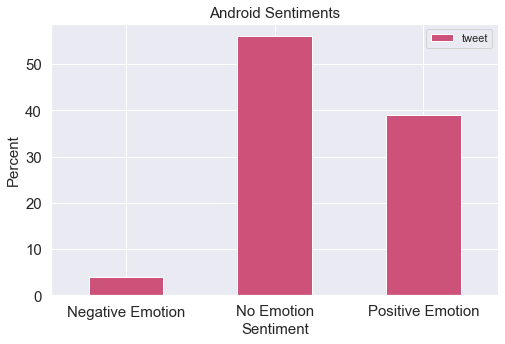

In [242]:
ax=dfa.plot(kind="bar",figsize=(8,5),fontsize=15,color='#CC527A')
ax.set_xticklabels(['Negative Emotion','No Emotion','Positive Emotion'],rotation=0,fontsize=15)
ax.set_title('Android Sentiments',fontsize=15)
ax.set_ylabel('Percent',fontsize=15)
ax.set_xlabel('Sentiment',fontsize=15)

In [248]:
df.tweet

0         wesley83 I have a 3G iPhone  After 3 hrs twe...
1        jessedee Know about  fludapp   Awesome iPad i...
2        swonderlin Can not wait for  iPad 2 also  The...
3        sxsw I hope this year's festival isn't as cra...
4        sxtxstate great stuff on Fri  SXSW  Marissa M...
                              ...                        
9087                        Ipad everywhere   SXSW  link 
9088    Wave  buzz    RT  mention We interrupt your re...
9089    Google's Zeiger  a physician never reported po...
9090    Some Verizon iPhone customers complained their...
9091    Ï¡Ïàü ÊÎÒ£Áââ £â ÛâRT  ...
Name: tweet, Length: 9092, dtype: object

In [574]:
from TwitterAPI import TwitterAPI
api = TwitterAPI(7yLnQWvEWBXKQM9LVTnCIGEcY, gkGOddk5cgnhpLgU939uxxVDom2w7mGr0lpPEoPwr6kKuTvwkh)

SyntaxError: invalid syntax (<ipython-input-574-289d452bdfdf>, line 2)

In [ ]:
r = api.request('search/tweets', {'q':'apple'})
for item in r:
        print(item)

In [576]:

export 'CONSUMER_KEY'='7yLnQWvEWBXKQM9LVTnCIGEcY'
export 'CONSUMER_SECRET'='gkGOddk5cgnhpLgU939uxxVDom2w7mGr0lpPEoPwr6kKuTvwkh'

SyntaxError: invalid syntax (<ipython-input-576-ec8b20afe3de>, line 1)

In [578]:


def auth():
    return os.environ.get("AAAAAAAAAAAAAAAAAAAAAItIKQEAAAAAFBwve4mmNO%2B7iYoo6GxrpGSC2VY%3Di41oVj61sNqndvsyhGyKSMY7GeJttYUA0ImZqK1U6jorSCi4eE")


def create_url():
    query = "from:twitterdev -is:retweet"
    # Tweet fields are adjustable.
    # Options include:
    # attachments, author_id, context_annotations,
    # conversation_id, created_at, entities, geo, id,
    # in_reply_to_user_id, lang, non_public_metrics, organic_metrics,
    # possibly_sensitive, promoted_metrics, public_metrics, referenced_tweets,
    # source, text, and withheld
    tweet_fields = "tweet.fields=author_id"
    url = "https://api.twitter.com/2/tweets/search/recent?query={}&{}".format(
        query, tweet_fields
    )
    return url


def create_headers(bearer_token):
    headers = {"Authorization": "Bearer {}".format(bearer_token)}
    return headers


def connect_to_endpoint(url, headers):
    response = requests.request("GET", url, headers=headers)
    print(response.status_code)
    if response.status_code != 200:
        raise Exception(response.status_code, response.text)
    return response.json()


def main():
    bearer_token = auth()
    url = create_url()
    headers = create_headers(bearer_token)
    json_response = connect_to_endpoint(url, headers)
    print(json.dumps(json_response, indent=4, sort_keys=True))


if apple == "apple":
    main()

In [ ]:
requests.get(url, params={key: value}, args)

In [ ]:
import numpy as np
import tweepy
import requests
import base64

#Define your keys from the developer portal
consumer_key = 'XXXXXXXXXXXXXXXXXXXXXX'
consumer_secret = 'XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX'
